# Principal Component Analysis (PCA)

## What is PCA:

Principal Component Analysis (PCA) is a dimensionality reduction technicque which is used to reduce the dimension of the data. There are 2 main needs behind reducing the dimensionality in any given data:
        1. To visualize the data: Human can't visualize the data in higher dimensions. To visualize any given data, we need it in 2 or at the most, 3 dimensions.
        2. To optimize ML Algorithms: In any given data, not all the dimensions will be of same significance. Through PCA, we can identify the data of higher significance and use only those for the analysis.

## Steps in PCA:

Below are the steps we need to follow:
    1. Data Standardization
    2. Covariance Matrix Computation
    3. Compute the Eigen vectors and Eigen values of Covariance matrix
    4. Projection Matrix
    5. Recast the data along principal component access

### Data Standardization

The aim of data standardization is to have data in same range so that each of them contribute equially to the analysis. 

<img src="Std.png">

### Covariance Matrix Computation

The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them.

To calculate covariance matrix for a matrix X, here is the formula: 
        Cov(X) = (1/n)*(X.Transpose * X)

### Compute the Eigen vectors and Eigen values of Covariance matrix

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

A beautiful explanation for Eignen values and vectors can be found here: https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

### Projection Matrix

Projection Matrix is simply a matrix that has as columns the eigenvectors of the components that we decide to keep. If it is for the visualizations, ideally one should keep components with heighest eigenvalues, and if it is for the dimensionality reduction, one should keep "k" components, where "k" is decided by how much spread we need to retain from the original data.

### Transform the data along principal component access

In this step, which is the last one, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components (hence the name Principal Components Analysis). This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.

## Loading and visualization of MNIST dataset

In [1]:
# Loading the libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh 
import seaborn as sns


In [2]:
# Loading MNIST Dataset
df = pd.read_csv('MNIST_train.csv')

In [3]:
# shape of the dataset
df.shape

(42000, 785)

In [4]:
# Storing labels separately
label = df['label']

In [5]:
# Removing label from the dataset and storing only actual data
data = df.drop("label",axis=1)

In [6]:
data.shape

(42000, 784)

As we can see, the loaded dataset has 42000 data samples, each with 784 dimensional data. 

In [7]:
# Visualizing first 5 rows of the dataset
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(data.shape)
print(label.shape)

(42000, 784)
(42000,)


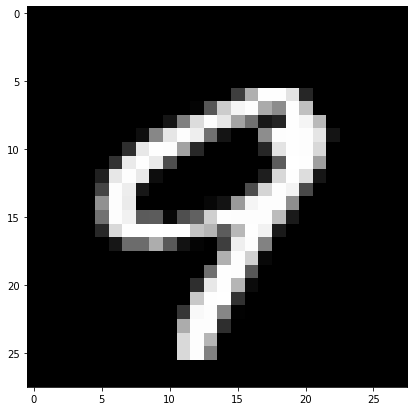

9


In [9]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = data.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(label[idx])

So for the given sample visualization, we can see that the image displayed from 784 dimensional data for 200th sample as well as the label for it both are "9"

In [10]:
label_sample = label #.head(1000)
data_sample = data #.head(1000)

print("the shape of sample data = ", data_sample.shape)

the shape of sample data =  (42000, 784)


## Implementation and visualization using basic libraries

### Standardizing the data

In [11]:
# Data-preprocessing: Standardizing the data

data_std = StandardScaler().fit_transform(data_sample)
print(data_std.shape)

(42000, 784)


### Covarinace matrix calculation

In [12]:
#find the co-variance matrix which is : (1/n) * A^T * A

# matrix multiplication using numpy

covar_matrix = np.matmul(data_std.T , data_std)/data_std.shape[0]

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [13]:
covar_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

###  Compute the Eigen vectors and Eigen values of Covariance matrix

In [14]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [15]:
#swapping the rows of eigen vectors since the largest value is in second place
final_vectors = np.vstack((vectors[1],vectors[0]))

In [16]:
final_vectors.shape

(2, 784)

### Projection Matrix

In [17]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(final_vectors, data_std.T)

print (" resultanat new data points' shape ", final_vectors.shape, "X", data_std.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


### Recast the data along principal component access

In [18]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, label_sample)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.140478      -5.226445    1.0
1      19.292332       6.032996    0.0
2      -7.644503      -1.705813    1.0
3      -0.474207       5.836139    4.0
4      26.559574       6.024818    0.0


C:\Users\Windows10\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


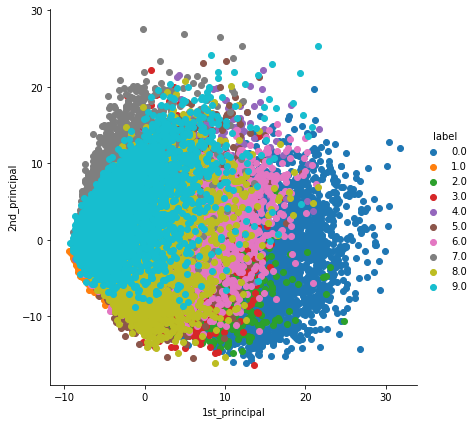

In [19]:
# ploting the 2d data points with seaborn

sns.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## Implementation using Scikit-Learn

In [20]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [21]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(data_sample)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (42000, 2)


In [22]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, label_sample)).T

C:\Users\Windows10\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


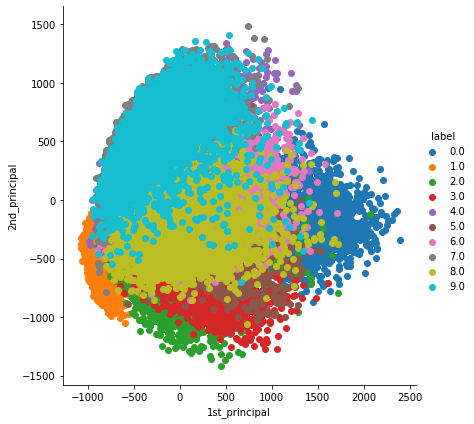

In [23]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA for dimensionality redcution

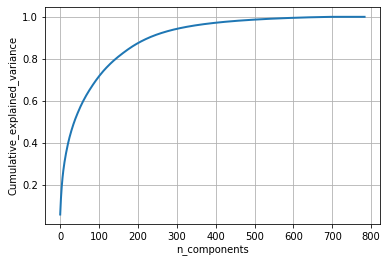

In [24]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(data_std)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

Observations: 
    1. The graph indicates the coverage of variance as number of components increase
    2. For example, if we pick 100 components (Greatest 100 Eigen values and corresponding Eigen vectors), we will cover 70% of the variance from the original data. So we will miss 30% of information
    3. If we need to cover 95% of the variance in the original data, we need to pick roughly 350 samples

## Drawbacks of PCA:

Following are major drawbacks of PCA:
    1. Independent variables become less interpretable
    2. Information loss
    3. Standardizing the data is mandatory before perforing PCA

## Advantages of PCA:

Following are the major advantages of PCA:
    1. Removes correlated features
    2. Improves algorithm performance (Since we are reducing the dimension)
    3. Reduces overfitting
    4. Improves visializations